_RealValuedColumn(column_name='', dimension=8, default_value=None, dtype=tf.float32, normalizer=None)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f061197d6a0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmppxouvp_d'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmppxouvp_d/model.ckpt.
INFO:tensorflow:loss = 8.252223, step = 1
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmppx

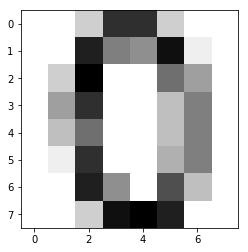

In [36]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plot
    
digits = datasets.load_digits()
training_size = int(digits.images.shape[0]/2)

training_images = digits.images[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0:training_size]
print(tf.contrib.layers.real_valued_column("", dimension=8))

classifier = tf.contrib.learn.DNNClassifier(
        feature_columns=[tf.contrib.layers.real_valued_column("", dtype=tf.float64)],
        # 2  hidden layers of 50 nodes each
        hidden_units=[50, 50],
        # 10 classes: 0, 1, 2.....3
         n_classes=10)
classifier.fit(training_images, training_target, steps=100)

#prediction
predict_images = digits.images[training_size+1:]
actual_labels = digits.target[training_size+1:]
evaluation = classifier.evaluate(x=predict_images.reshape((predict_images.shape[0], -1)), y=actual_labels)
print(evaluation)
predict = classifier.predict(predict_images[16].reshape(1,-1))
print(list(predict))
plot.imshow(predict_images[16], cmap=plot.cm.gray_r)
plot.show()


In [56]:
from PIL import Image
import numpy

imgfile = Image.open("flower.jpg")

imgdata = []
for data in imgfile.getdata():
    print(data)
    imgdata.append(data[0] << 16 | data[1] << 8 |data[2])
    print(format(1<<7, '02x'))
    print(format(data[0], '02x'))
    print(format(data[0]<<16, '02x'))
    print(format(data[1], '02x'))
    print(format(data[1]<<8, '02x'))
    print(format(data[2], '02x'))
    print(format(data[0] << 16 | data[1] << 8 |data[2], '02x'))
    print(data[0] << 16 | data[1] << 8 |data[2])
    print(imgdata)
    break
    
numarray = numpy.array(imgdata, numpy.uint8)


(102, 94, 105)
80
66
660000
5e
5e00
69
665e69
6708841
[6708841]


In [58]:
from PIL import Image
import numpy

imgfile = Image.open("flower.jpg")

imgdata = []
for data in imgfile.getdata():
    imgdata.append(data[0] << 16 | data[1] << 8 |data[2])
    break
    
numarray = numpy.array(imgdata, numpy.uint8)


In [175]:
import os,sys
from PIL import Image
import matplotlib.pyplot as plot
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy

imgfile = Image.open("flower.jpg")


labels = ['green', 'green', 'yellow', 'green', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green'
                  ]

imgdata = []
yaxis = 0
for i in range(0, 640, 128):
    xaxis=0
    for j in range(0,480, 96):
        bbox = (i, j, i+128, j+96)
        boxdata = []
        for data in imgfile.crop(bbox).getdata():
            boxdata.append(data[0] << 16 | data[1] << 8 |data[2])
        numarray = numpy.array(boxdata, numpy.uint32)
        imgdata.append(boxdata)
        xaxis = xaxis + 1
    yaxis = yaxis + 1

imgdata = numpy.array(imgdata)

training_size = int(imgdata.shape[0]/2)

training_images = imgdata[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = labels[0:training_size]

classifier = Perceptron(max_iter=1000)
#classifier = MLPClassifier(alpha=2, max_iter=1000)
#classifier = svm.SVC(gamma=0.001, C=100.)
#classifier = Perceptron(max_iter=1000)

#training
classifier.fit(training_images, training_target)

#prediction
predict_images = imgdata[training_size+1:]
actual_labels = labels[training_size+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels, predicted_labels))

             precision    recall  f1-score   support

      green       0.45      1.00      0.62         5
     yellow       1.00      0.14      0.25         7

avg / total       0.77      0.50      0.41        12



In [119]:
training_images = data[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = digits.target[0:int(digits.target.shape[0]/2)]

classifier = Perceptron(max_iter=1000)
#training
classifier.fit(training_images, training_target)

#prediction
predict_images = digits.images[int(digits.images.shape[0]/2)+1:]
actual_labels = digits.target[int(digits.target.shape[0]/2)+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels,predicted_labels))

AttributeError: 'tuple' object has no attribute 'reshape'

In [148]:
import os,sys
from PIL import Image
import matplotlib.pyplot as plot
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy

imgfile = Image.open("flower.jpg")


labels = ['green', 'green', 'yellow', 'green', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'green'
                  ]

for i in range(0,len(labels)):
    if(labels[i] == 'green'):
        labels[i] = 0
    else:
        labels[i] = 1

imgdata = []
yaxis = 0
for i in range(0, 640, 128):
    xaxis=0
    for j in range(0,480, 96):
        bbox = (i, j, i+128, j+96)
        boxdata = []
        for data in imgfile.crop(bbox).getdata():
            boxdata.append(data[0] << 16 | data[1] << 8 |data[2])
        numarray = numpy.array(boxdata, numpy.uint32)
        imgdata.append(boxdata)
        xaxis = xaxis + 1
    yaxis = yaxis + 1

imgdata = numpy.array(imgdata)

training_size = int(imgdata.shape[0]/2) + 8

training_images = imgdata[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = labels[0:training_size]

classifier = tf.contrib.learn.DNNClassifier(
     feature_columns=[tf.contrib.layers.real_valued_column("", dtype=tf.int8)],
     # 2 hidden layers of 10 nodes each
     hidden_units=[10, 10, 10],
     # 2 classes
     n_classes=2)


#training
classifier.fit(training_images, training_target, steps=100)

#prediction
predict_images = imgdata[training_size+1:]
actual_labels = labels[training_size+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))
evaluation = classifier.evaluate(x=predict_images.reshape((predict_images.shape[0], -1)), y=actual_labels)
print(evaluation['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0606579710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmplexluc3s'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmplexluc3s/model.ckpt.
INFO:tensorflow:loss = 1953412.6, step = 1
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmplexluc3s/model.ckpt.
INFO:tensorflow:Loss for final step: 0.69314766.
INFO:tensorflow:Restoring paramet

In [205]:
import os,sys
from PIL import Image
import matplotlib.pyplot as plot
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy

imgfile = Image.open("flower.jpg")


labels = ['green', 'green', 'green', 'green', 'yellow', 'green', 'green', 'green', 'green', 'green',
                   'green', 'green', 'green', 'green', 'yellow', 'yellow', 'green', 'green', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'green', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow', 'green', 'green', 'green'
                  ]


for i in range(0,len(labels)):
    if(labels[i] == 'green'):
        labels[i] = 0
    else:
        labels[i] = 1

imgdata = []
yaxis = 0
for i in range(0, 640, 64):
    xaxis=0
    for j in range(0,480, 48):
        bbox = (i, j, i+64, j+48)
        boxdata = []
        for data in imgfile.crop(bbox).getdata():
            boxdata.append(data[0] << 16 | data[1] << 8 |data[2])
        numarray = numpy.array(boxdata, numpy.int64)
        imgdata.append(boxdata)
        xaxis = xaxis + 1
    yaxis = yaxis + 1

imgdata = numpy.array(imgdata)

training_size = int(imgdata.shape[0]/2) + 30

training_images = imgdata[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = labels[0:training_size]

classifier = tf.contrib.learn.DNNClassifier(
     feature_columns=[tf.contrib.layers.real_valued_column("", dtype=tf.int8)],
     # 2 hidden layers of 10 nodes each
     hidden_units=[20, 20, 20, 20],
     # 2 classes
     n_classes=2)


#training
classifier.fit(training_images, training_target, steps=1000)

#prediction
predict_images = imgdata[training_size+1:]
actual_labels = labels[training_size+1:]
evaluation = classifier.evaluate(x=predict_images.reshape((predict_images.shape[0], -1)), y=actual_labels)
print(evaluation['accuracy'])


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0606093c88>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp3oq1_gtd'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3oq1_gtd/model.ckpt.
INFO:tensorflow:loss = 4244435.0, step = 1
INFO:tensorflow:global_step/sec: 231.883
INFO:tensorflow:loss = 42813.48, step = 101 (0.438 sec)
INFO:tensorflow:global_step/sec: 221.537
INFO:tensorflow:loss 

In [192]:
import os,sys
from PIL import Image
import matplotlib.pyplot as plot
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy

imgfile = Image.open("flower.jpg")


labels = ['green', 'green', 'green', 'green', 'yellow', 'green', 'green', 'green', 'green', 'green',
                   'green', 'green', 'green', 'green', 'yellow', 'yellow', 'green', 'green', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'green', 'green',
                   'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green',
                   'green', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow', 'green', 'green', 'green'
                  ]

imgdata = []
yaxis = 0
for i in range(0, 640, 64):
    xaxis=0
    for j in range(0,480, 48):
        bbox = (i, j, i+64, j+48)
        boxdata = []
        for data in imgfile.crop(bbox).getdata():
            boxdata.append(data[0] << 16 | data[1] << 8 |data[2])
        numarray = numpy.array(boxdata, numpy.uint32)
        imgdata.append(boxdata)
        xaxis = xaxis + 1
    yaxis = yaxis + 1

imgdata = numpy.array(imgdata)

training_size = int(imgdata.shape[0]/2) + 30

training_images = imgdata[0:training_size]
training_images = training_images.reshape((training_images.shape[0], -1))

training_target = labels[0:training_size]

classifier = Perceptron(max_iter=1000)
#classifier = MLPClassifier(alpha=2, max_iter=1000)
#classifier = svm.SVC(gamma=0.001, C=100.)
#classifier = Perceptron(max_iter=1000)

#training
classifier.fit(training_images, training_target)

#prediction
predict_images = imgdata[training_size+1:]
actual_labels = labels[training_size+1:]
predicted_labels = classifier.predict(predict_images.reshape((predict_images.shape[0], -1)))

#classification report
print(metrics.classification_report(actual_labels, predicted_labels))

             precision    recall  f1-score   support

      green       0.50      0.60      0.55        10
     yellow       0.43      0.33      0.38         9

avg / total       0.47      0.47      0.46        19



In [7]:
import json

colors = [[120, 30, 120], [150, 30, 10]]
user = "user 1"

data = dict()
data['user'] = user
data['colors'] = colors

print(json.dumps(data))


{"user": "user 1", "colors": [[120, 30, 120], [150, 30, 10]]}


In [8]:
import json

colors = [[120, 30, 120], [150, 30, 10]]
user = "user 1"

data = dict()
data['user'] = user
data['colors'] = colors

with open("user.json", "w") as file:
    json.dump(data, file)

file.close()

In [9]:
import json

data = ""
with open("user.json", "r") as file:
    data = json.load(file)

print(data)

{'user': 'user 1', 'colors': [[120, 30, 120], [150, 30, 10]]}
